# Impacto del título en la popularidad en los de videos de Youtube

Objetivos:
* Identificar los temas más populares en los videos de tendencia de YouTube para cada región (MX y USA).
* Evaluar la correlación entre la elección del título del video y las metricas de popularidad,como el número de visualizaciones.
* Presentar los resultados del análisis de los datos recopilados durante el mes de mayo de 2023 para identificar los temas más populares en los videos de tendencia.

## Importacion librerías

In [1]:
import pandas as pd
import os
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Importar dataset

In [2]:
INPUT_DIR = '../input/youtube-trending-video-dataset/'
df_US = pd.read_csv(INPUT_DIR + 'US_youtube_trending_data.csv')
df_MX = pd.read_csv(INPUT_DIR + 'US_youtube_trending_data.csv')

In [3]:
df_MX.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [4]:
df_MX.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [5]:
df_US.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


## Procesamiento

### Filtrar datos Mayo 2023

In [6]:
# Convertir la columna 'publishedAt' a tipo fecha
df_MX['publishedAt'] = pd.to_datetime(df_MX['publishedAt'])

# Filtrar los datos para el mes de mayo de 2023
mayo_2023_mx = df_MX[(df_MX['publishedAt'].dt.year == 2023) & (df_MX['publishedAt'].dt.month == 5)]

# Mostrar los datos filtrados
mayo_2023_mx.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
199390,SuPo5UjYyE4,Stephen A. REVEALS what spells trouble for the...,2023-05-01 15:37:17+00:00,UCVSSpcmZD2PwPBqb8yKQKBA,NBA on ESPN,17,2023-05-02T00:00:00Z,Stephen A. REVEALS what spells trouble for the...,335324,4540,0,2263,https://i.ytimg.com/vi/SuPo5UjYyE4/default.jpg,False,False,"On First Take, Stephen A. Smith, Kendrick Perk..."
199391,C-WQcCqecHg,Apex Legends: Arsenal Gameplay Trailer,2023-05-01 15:00:15+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2023-05-02T00:00:00Z,apex legends|apex|apex legends season 17|apex ...,1444465,56517,0,3800,https://i.ytimg.com/vi/C-WQcCqecHg/default.jpg,False,False,Show your caliber in Apex Legends: Arsenal. Th...
199393,EU04UEnhv_o,Jack Harlow - They Don't Love It [Official Mus...,2023-05-01 16:00:08+00:00,UC6vZl7Qj7JglLDmN_7Or-ZQ,Jack Harlow,10,2023-05-02T00:00:00Z,jack harlow|jack rapper|harlow rapper|private ...,443608,38141,0,1859,https://i.ytimg.com/vi/EU04UEnhv_o/default.jpg,False,False,Jack Harlow - They Don't Love ItListen to 'Jac...
199395,wIBZ7UcQmDU,[최초공개] LE SSERAFIM(르세라핌) - UNFORGIVEN (feat. N...,2023-05-01 11:25:34+00:00,UCTQVIXvcHrR9jYoJ6qaBAow,M2,24,2023-05-02T00:00:00Z,엠넷|Mnet|엠투|M2|MPD|엠피디|Kpop|K-Pop|K팝|아이돌|한국|라이브...,3561258,240804,0,5594,https://i.ytimg.com/vi/wIBZ7UcQmDU/default.jpg,False,False,[LE SSERAFIM COMEBACK SHOW UNFORGIVEN] LE SSER...
199397,FJqd58_WgGo,Zach Bryan - Oklahoma Smokeshow,2023-05-01 04:24:38+00:00,UCwK3C8Vgphad4PweezfUBAQ,Zach Bryan,10,2023-05-02T00:00:00Z,[None],163561,10006,0,501,https://i.ytimg.com/vi/FJqd58_WgGo/default.jpg,False,False,NaN


In [7]:
mayo_2023_mx.shape

(6182, 16)

### Título, # de Visualizaciones

In [8]:
# Seleccionar las columnas 'title' y 'view_count'
data_mx = mayo_2023_mx[['title', 'view_count']]

# Imprimir los resultados
data_mx.head()

,title,view_count
199390,Stephen A. REVEALS what spells trouble for the...,335324
199391,Apex Legends: Arsenal Gameplay Trailer,1444465
199393,Jack Harlow - They Don't Love It [Official Mus...,443608
199395,[최초공개] LE SSERAFIM(르세라핌) - UNFORGIVEN (feat. N...,3561258
199397,Zach Bryan - Oklahoma Smokeshow,163561


Identificar valores nulos

In [9]:
missing_values = data_mx[['title', 'view_count']].isnull().sum()

# Imprimir el número de valores faltantes o nulos en cada columna
missing_values

title         0
view_count    0
dtype: int64

Verificar formato de los datos

In [10]:
data_mx.dtypes

title         object
view_count     int64
dtype: object

Ordenar los datos en base a view_count

In [11]:
data_mx_sorted = data_mx.sort_values('view_count', ascending=True)
data_mx_sorted

,title,view_count
200735,Live at the Met Gala With Vogue,0
200970,Live at the Met Gala With Vogue,0
200044,Live at the Met Gala With Vogue,0
199810,Live at the Met Gala With Vogue,0
199590,Live at the Met Gala With Vogue,0
...,...,...
205422,"Ages 1 - 100 Fight For $500,000",84406948
205657,"Ages 1 - 100 Fight For $500,000",90058865
205893,"Ages 1 - 100 Fight For $500,000",95520120
206127,"Ages 1 - 100 Fight For $500,000",100294791


Dividir el conjunto de datos ordenados quintiles y crear una nueva columna en la base
de datos para almacenar las categorías basadas en los quintiles llamada
category_view_count.

In [12]:
#Asignamos los datos ordenados a una nueva variable
data_mx_1=data_mx_sorted
# Calcular los quintiles y asignar las categorías a la columna 'category_view_count'
data_mx_1['category_view_count'] = pd.qcut(data_mx_1['view_count'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])


En donde los quintiles desde Q1 a Q2 van desde el menos visto al más visto

In [13]:
data_mx_1

,title,view_count,category_view_count
200735,Live at the Met Gala With Vogue,0,Q1
200970,Live at the Met Gala With Vogue,0,Q1
200044,Live at the Met Gala With Vogue,0,Q1
199810,Live at the Met Gala With Vogue,0,Q1
199590,Live at the Met Gala With Vogue,0,Q1
...,...,...,...
205422,"Ages 1 - 100 Fight For $500,000",84406948,Q5
205657,"Ages 1 - 100 Fight For $500,000",90058865,Q5
205893,"Ages 1 - 100 Fight For $500,000",95520120,Q5
206127,"Ages 1 - 100 Fight For $500,000",100294791,Q5


#### Subconjunto de datos Q1 

In [14]:
# Filtrar los datos correspondientes a la categoría "Q1"
q1_data_mx = data_mx_1.loc[data_mx_1['category_view_count'] == 'Q1']
q1_data_mx

,title,view_count,category_view_count
200735,Live at the Met Gala With Vogue,0,Q1
200970,Live at the Met Gala With Vogue,0,Q1
200044,Live at the Met Gala With Vogue,0,Q1
199810,Live at the Met Gala With Vogue,0,Q1
199590,Live at the Met Gala With Vogue,0,Q1
...,...,...,...
202876,'Queen Charlotte: A Bridgerton Story' Cast Pla...,395828,Q1
202023,I Scared My Friend When He’s ALONE in Minecraft,396453,Q1
202907,First Start on An ABANDONED Shelby Daytona Cou...,396790,Q1
204508,NEW Movement Glitches in Tears of The Kingdom ...,396878,Q1


#### Procesamiento del campo "title" para extraer las palabras más usadas

In [15]:
# Definir una lista de palabras vacías (stop words)
stop_words = set(stopwords.words('english'))

# Concatenar todos los títulos en un solo texto
text = ' '.join(q1_data_mx['title'])

# Tokenizar el texto en palabras individuales
tokens = word_tokenize(text)

# Filtrar las palabras vacías (stop words)
tokens = [word for word in tokens if word.lower() not in stop_words]

# Calcular la frecuencia de las palabras
word_freq = Counter(tokens)

# Obtener las 5 palabras más usadas
top_words = word_freq.most_common(5)

# Imprimir las palabras más usadas
for word, freq in top_words:
    print(f"{word}: {freq} ocurrencias")


|: 362 ocurrencias
-: 302 ocurrencias
!: 298 ocurrencias
): 205 ocurrencias
(: 201 ocurrencias


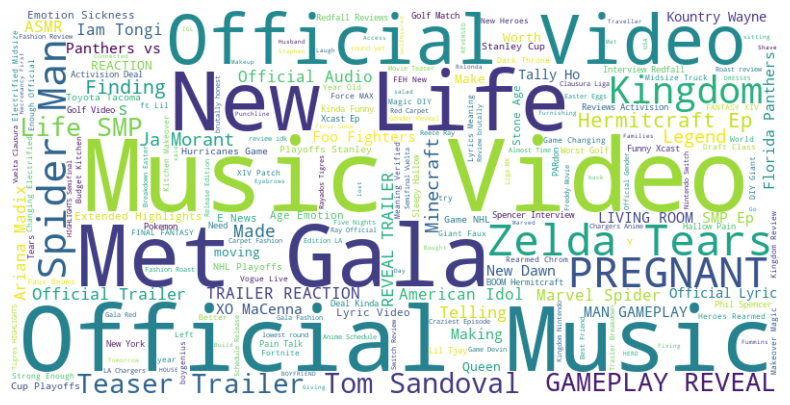

In [16]:
# Concatenar todos los títulos en un solo texto
text = ' '.join(q1_data_mx['title'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()